In [84]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

mean: 0.749, std: 0.035


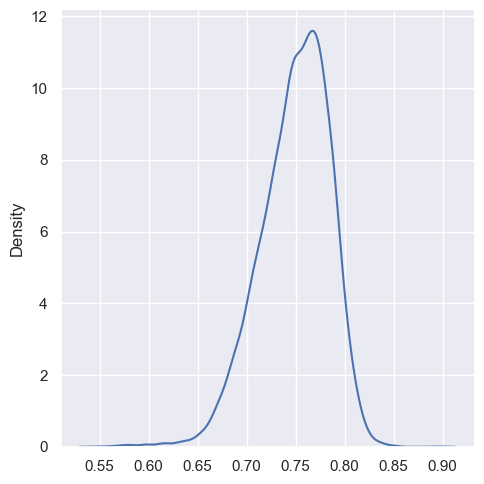

In [88]:
# Inheritable defensive trait (thickness of shell, etc)

def simulate_defensive_trait(n_prey=1000, n_steps=100, max_prey=10000):
    x = np.full(n_prey,0.5) # All prey start with average defensive trait
    for t in range(n_steps):
        r = np.random.rand(len(x))
        survivors = x[r < x] # Randomly kill prey, stronger defensive trait -> higher chance of surviving

        x = np.repeat(survivors, np.where(survivors > 0.8, 1, 2)) # Too high - disadvantage to reproduction

        mutation = np.random.normal(loc=0, scale=0.01, size=len(x)) # Offspring has the same trait as parents plus a random mutation distributed normally
        x += mutation
        x = np.clip(x, 0, 1) # 0 =< x =< 1

        if len(x) > max_prey: # Kill random prey to keep simulation size manageable - will not affect distribution
            np.random.shuffle(x)
            x = x[:max_prey]
    return x

data = simulate_defensive_trait()
mean =np.mean(data)
std = np.std(data)
sns.displot(data, kind='kde')
print(f"mean: {np.mean(data):.3f}, std: {np.std(data):.3f}")

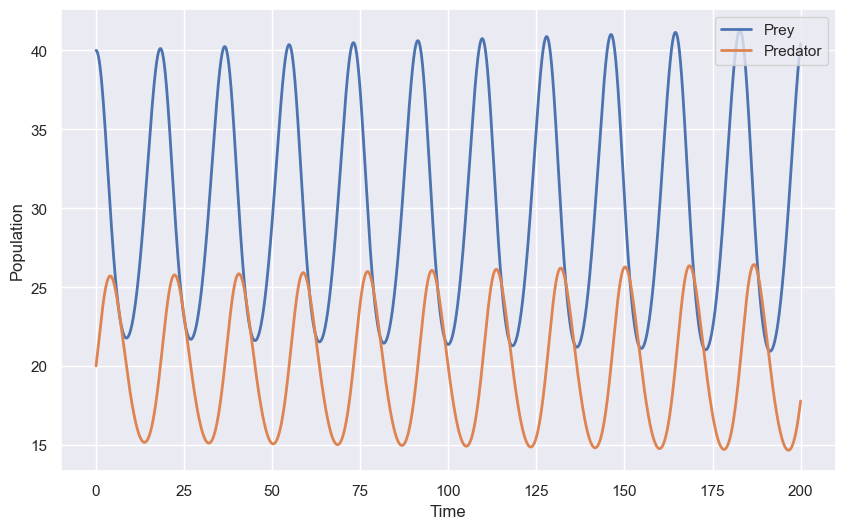

In [94]:
# Lotka-Volterra model

def lotka_volterra(x=40, y=20, n_steps=20000, dt=0.01):
    prey_growth_rate = 0.4 # Parameters for model
    predation_rate = 0.02
    pred_death_rate = 0.3
    reproduction_rate = 0.01

    t = 0
    data = np.zeros((n_steps,3))

    for i in range(n_steps):
        dx = prey_growth_rate*x - predation_rate*x*y
        dy = - pred_death_rate*y + reproduction_rate*x*y
        x += dx*dt
        y += dy*dt
        t += dt
        data[i] = (x,y,t)

    return data

df = pd.DataFrame(lotka_volterra(), columns=['Prey', 'Predator', 'Time'])
df_melted = df.melt(id_vars='Time', var_name='Species', value_name='Population')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Time', y='Population', hue='Species', linewidth=2)
plt.legend(loc='upper right')
plt.show()

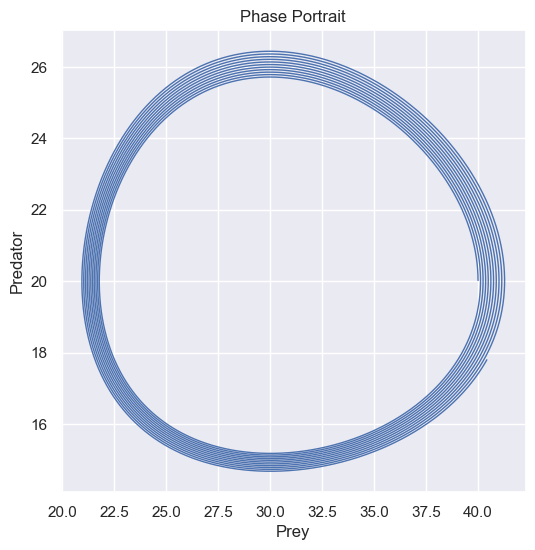

In [95]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=df, x='Prey', y='Predator', sort=False, lw=1)
plt.title("Phase Portrait")
plt.show()